<a href="https://colab.research.google.com/github/luckaiszin/Statistics_Notebook/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [824]:
import numpy as np
import pandas as pd
import statistics as st
from scipy import stats

## Moda, Média e Mediana

In [825]:
data = [3,10,13,24,35]

### Média

#### Padrão

In [826]:
u_padrao = sum(data)/len(data)
print(u_padrao)

17.0


#### Numpy

In [827]:
u_numpy = np.array(data)
print(u_numpy.mean())

17.0


#### Pandas

In [828]:
dicionario = {'data': data}
df = pd.DataFrame(dicionario)
print(df.mean())

data    17.0
dtype: float64


In [829]:
df['data'].mean()

17.0

#### Statistics

In [830]:
st.mean(data)

17

### Mediana

In [831]:
data = [3,13,24,10,35]
data_run = data
data.sort()

#### Padrão

In [832]:
def mediana(list: data):
  if len(data)%2 == 0:
    middle = len(data)/2
    return data[middle]+data[middle-1]/2
  else:
    return data[len(data)//2]

In [833]:
mediana(data)

13

#### Numpy

In [834]:
median_np = np.array(data)
np.median(median_np)

13.0

In [835]:
# Numpy já aplica um algorítmo de sort

median_np = np.array(data_run)
np.median(median_np)

13.0

#### Pandas

In [566]:
df.median()

,0
data,13.0


In [836]:
df['data'].median()

13.0

#### Statistics

In [837]:
st.median(data_run)

13

### Mode

In [838]:
data = [3,13,24,10,35,10]

#### Padrão

In [839]:
from collections import Counter

In [840]:
def mode(list: data):

  freq = Counter(data) # Transforma num dicionario
  max_freq = max(freq.values()) # Pega o valor máximo
  mode = [num for num,frequency in freq.items() if frequency == max_freq ] # transforma o dicionario em items

  return mode

In [841]:
mode(data)

[10]

#### Numpy

In [842]:
np.bincount(data)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [843]:
np.argmax(np.bincount(data))

10

#### Pandas

In [844]:
df = pd.DataFrame({'data': data})

In [845]:
df['data'].mode().tolist()

[10]

#### Statistics

In [846]:
st.mode(data)

10

### *Args & *Kwargs

In [847]:
# Média

def media(*args):
  sum = 0
  for i in args:
    sum += i

  return sum/len(args)

In [848]:
media(3,10,7,5)

6.25

In [849]:
# Mediana

def mediana(*args):
  M = []
  for i in args:
    M.append(i)
  M.sort()
  if len(M)% 2 == 0:
    metade = len(M)//2
    return (M[metade] + M[metade-1])/2
  else:
    return M[len(M)// 2]

In [850]:
mediana(4,5,3,7)

4.5

In [851]:
# Moda

def moda(*args):

  freq = Counter(args) # Transforma num dicionario
  max_freq = max(freq.values()) # Pega o valor máximo
  mode = [num for num,frequency in freq.items() if frequency == max_freq ] # transforma o dicionario em items

  return mode

In [852]:
moda(1,2,2,4,4)

[2, 4]

## Variância e Desvio Padrão

**População X Amostra** :

*População*: Leva em consideração todos os indivíduos(Eleições).
*Grau de liberdade*: N

*Amostra*: Leva em consideração uma parcela da população(Pesquisa de opinião).
*Grau de liberdade*: N-1


Ambos os parâmetros servem para medir quão espalhados estão os valores da média. Numa curva normal/Gaussiana permite observar quão achatada a curva está.

### Padrão

In [853]:
data = [33,47,53,51,22,24,3,34,567,8,765]

In [854]:
mean = sum(data)/len(data)

In [586]:
print(mean)

146.0909090909091


In [587]:
square_difs = [(x - mean)**2 for x in data]

In [588]:
square_difs

[12789.553719008265,
 9819.008264462811,
 8665.917355371901,
 9042.280991735537,
 15398.553719008265,
 14906.190082644629,
 20475.00826446281,
 12564.371900826447,
 177164.46280991734,
 19069.09917355372,
 383048.46280991734]

In [589]:
variance_pop = sum(square_difs)/len(data)

In [590]:
std_pop =  variance_pop** 0.5

In [591]:
print(variance_pop)

62085.71900826446


In [592]:
print(std_pop)

249.1700604171064


In [593]:
variance_sample = sum(square_difs)/(len(data) - 1)

In [594]:
std_sample =  variance_sample** 0.5

In [595]:
print(variance_sample)

68294.29090909091


In [596]:
print(std_sample)

261.33176406455243


### Numpy

In [597]:
# População

np_pop_variance = np.var(data)

In [598]:
print(np_pop_variance)

62085.71900826446


In [599]:
np_pop_std = np.std(data)

In [600]:
print(np_pop_std)

249.1700604171064


In [601]:
# Amostra

np_sample_variance = np.var(data,ddof = 1)

In [602]:
print(np_sample_variance)

68294.29090909091


In [603]:
np_sample_std = np.std(data,ddof = 1)

In [604]:
print(np_sample_std)

261.33176406455243


### Statistics

Statistics(como o nome já diz) não nos dá a variância e o desvio padrão da população

In [605]:
# Amostra

In [606]:
st_pop_variance = st.variance(data)

In [607]:
st_pop_std = st.stdev(data)

In [608]:
print(st_pop_variance)

68294.29090909091


In [609]:
print(st_pop_std)

261.33176406455243


### Visualização

In [610]:
import matplotlib.pyplot as plt

In [611]:
from scipy.stats import norm

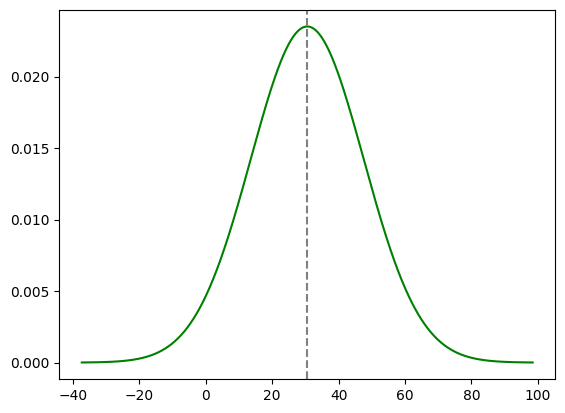

In [612]:
# Sem outliers

data_clean = [33,47,53,51,22,24,3,34,8]

mean = np.mean(data_clean)
std = np.std(data_clean)

x = np.linspace(mean - 4*std,mean + 4*std,1000)
y = norm(loc = mean,scale = std) # frozen object
y_pdf = y.pdf(x)

plt.plot(x,y_pdf,c = 'g')
plt.axvline(x=mean, color='gray', linestyle='--')
plt.show()

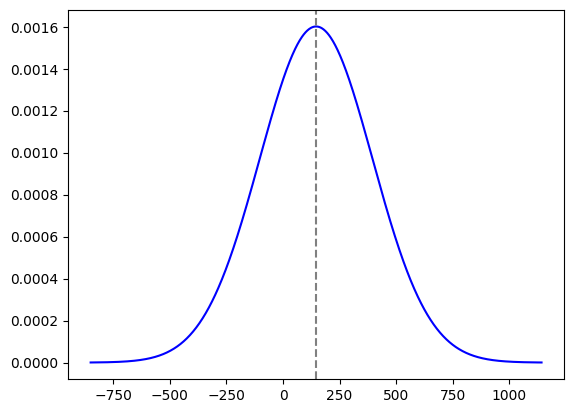

In [613]:
# Com outliers

mean = np.mean(data)
std = np.std(data)

x = np.linspace(mean - 4*std,mean + 4*std,1000)
y = norm(loc = mean,scale = std) # frozen object
y_pdf = y.pdf(x)

plt.plot(x,y_pdf,c = 'blue')
plt.axvline(x=mean, color='gray', linestyle='--')
plt.show()

## Z-Score

Avalia a quantos desvio padrão um determinado valor(x) está da média(u)

**Regra do 68-95-99,7**:

68% dos dados estão dentro de 1 desvio padrão da média;

95% dos dados estão dentro de 2 desvios padrões da média;

99,7% dos dados estão dentro de 3 desvios padrões da média;

Os demais valores podem ser considerados como outliers.




### Numpy

In [614]:
data = [10,12,22,21,55,1,42,32]

In [615]:
mean = np.mean(data)

In [616]:
std = np.std(data)

In [617]:
z_score_manual = [(x-mean)/std for x in data]

In [618]:
z_score_manual

[-0.861018707616916,
 -0.7412248004702147,
 -0.14225526473670785,
 -0.20215221831005853,
 1.8343442031838644,
 -1.400091289777072,
 1.0556838067303056,
 0.4567142709967989]

### Scipy

In [619]:
z_score_scipy = stats.zscore(data)

In [620]:
z_score_scipy

array([-0.86101871, -0.7412248 , -0.14225526, -0.20215222,  1.8343442 ,
       -1.40009129,  1.05568381,  0.45671427])

### Pandas

In [621]:
np.random.seed(9)

In [622]:
data_random = np.random.normal(loc = 0, scale = 1, size = 1000)

In [623]:
data_random

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00,
        6.75271167e-01,  3.19581170e-02,  9.18145896e-01,  3.80509466e-01,
        5.16367487e-01, -3.55239458e-01,  2.08777001e-01,  3.28411076e-01,
       -4.98224766e-01, -2.09177677e+00, -8.25877406e-02,  2.45518265e+00,
       -2.67211000e+00, -9.13279281e-01, -2.27314357e-01,  2.69315377e-01,
        1.13046126e+00,  1.04239745e+00,  1.30381044e+00,  1.38940073e+00,
       -6.56452578e-01, -5.62572959e-02, -4.99902620e-01,  4.36419381e-01,
       -3.75813047e-01, -9.23061583e-01,  1.91725024e+00, -1.50302842e-01,
       -6.38729756e-01,  8.24770331e-01, -1.21083874e+00, -5.03405377e-01,
       -7.01915693e-01, -

In [624]:
df = pd.DataFrame(data_random,columns = ['values'])

In [625]:
df.head()

,values
0,0.001109
1,-0.289544
2,-1.116066
3,-0.012883
4,-0.378361


In [626]:
df['z-score'] = (df['values']-df['values'].mean())/df['values'].std()

In [627]:
df.head()

,values,z-score
0,0.001109,-0.029871
1,-0.289544,-0.314858
2,-1.116066,-1.125267
3,-0.012883,-0.043590
4,-0.378361,-0.401944


In [628]:
within_1_std = len(df[(df['z-score']>= -1) & (df['z-score'] <= 1)])/len(df)*100
within_2_std = len(df[(df['z-score']>= -2) & (df['z-score'] <= 2)])/len(df)*100
within_3_std = len(df[(df['z-score']>= -3) & (df['z-score'] <= 3)])/len(df)*100

In [629]:
summary = pd.DataFrame({
    'STD DEV':['um','dois','três'],
    'Porcentagem':[within_1_std,within_2_std,within_3_std]
})

In [630]:
summary

,STD DEV,Porcentagem
0,um,67.9
1,dois,95.7
2,três,99.9


In [631]:
df['outlier'] = (df['z-score']<-3)|(df['z-score']>3)

In [632]:
top_10_z = df.sort_values(by = 'z-score',ascending= False).copy()

In [633]:
top_10_z

,values,z-score,outlier
334,3.210129,3.116591,True
936,2.792023,2.706635,False
521,2.546796,2.466189,False
517,2.511118,2.431207,False
31,2.455183,2.376362,False
...,...,...,...
32,-2.672110,-2.650977,False
62,-2.793370,-2.769873,False
511,-2.843646,-2.819168,False
900,-2.880142,-2.854954,False


In [634]:
down_10_z = df.sort_values(by = 'z-score',ascending= True).copy()

In [635]:
down_10_z.tail(10)

,values,z-score,outlier
443,2.261424,2.186381,False
598,2.344594,2.267929,False
127,2.401343,2.323572,False
69,2.417106,2.339028,False
640,2.435322,2.356888,False
31,2.455183,2.376362,False
517,2.511118,2.431207,False
521,2.546796,2.466189,False
936,2.792023,2.706635,False
334,3.210129,3.116591,True


## Quantiles

Valores que dividem o dataset em intervalos/grupo

A Mediana é um quantil de 50%

Quartil: divide o dataset em 4 partes iguais(25,50,75)

Decile: divide o dataset em 10 partes iguais(10,20,..,90,100)

Percentil: divide o dataset em 100 partes iguais(1,2,3,...,100)

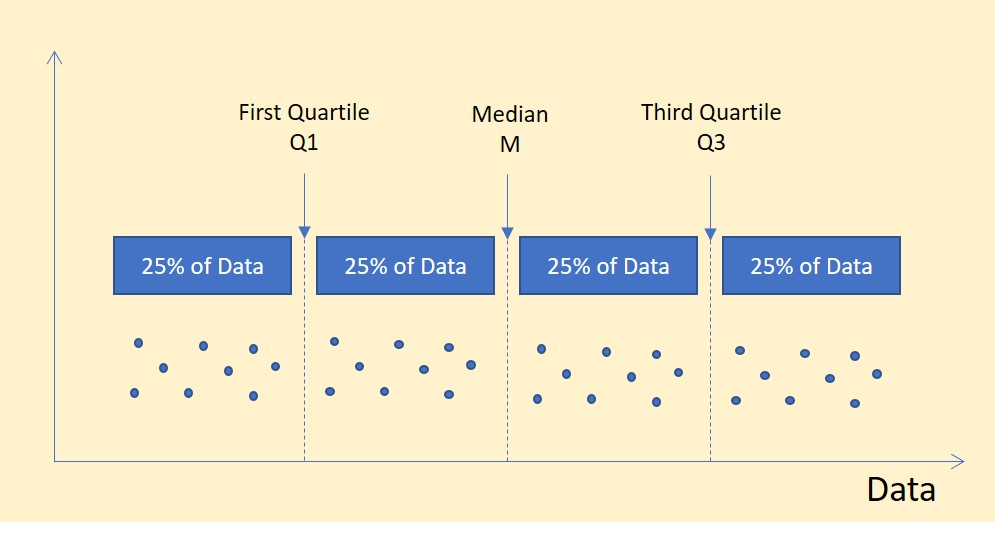

### Numpy

In [636]:
data = [13,74,11,12,56,33,18,7,96,55]

In [637]:
# Quartile

Q1 = np.percentile(data,25)
Q2 = np.percentile(data,50)
Q3 = np.percentile(data,75)

In [638]:
print(Q1)

12.25


In [639]:
print(Q2)

25.5


In [640]:
print(Q3)

55.75


In [641]:
# Deciles

D1 = np.percentile(data,10)
D9 = np.percentile(data,90)

In [642]:
print(D1)

10.6


In [643]:
print(D9)

76.19999999999999


In [644]:
# Percentile

P11 = np.percentile(data,11)
P53 = np.percentile(data,53)

In [645]:
print(P11)

10.96


In [646]:
print(P53)

29.550000000000008


### Pandas

In [647]:
df = pd.DataFrame({
    'A': data
})

In [648]:
df.head()

,A
0,13
1,74
2,11
3,12
4,56


In [649]:
# Quartil

Q1 = df['A'].quantile(0.25)
Q2 = df['A'].quantile(0.50)

In [650]:
print(Q1)

12.25


In [651]:
print(Q2)

25.5


In [652]:
# Deciles

D1 = df['A'].quantile(0.1)
D9 = df['A'].quantile(0.9)

In [653]:
print(D1)

10.6


In [654]:
print(D9)

76.19999999999999


In [655]:
# Percentiles

P17 = df['A'].quantile(0.17)
P53 = df['A'].quantile(0.53)

In [656]:
print(P17)

11.53


In [657]:
print(P53)

29.550000000000008


In [658]:
# Lista

quantiles_values = df['A'].quantile([0.25,0.33,0.75])

In [659]:
quantiles_values

,A
0.25,12.25
0.33,12.97
0.75,55.75


## Função Quantílica

A *Probability Point Function* (PPF), conhecida em português como *função quantílica* ou *função ponto de probabilidade*, é a inversa da função de distribuição acumulada (FDA ou CDF). Ela retorna o valor de uma variável aleatória associada a um determinado percentil ou probabilidade.

**Exemplo**

Dado um percentil \( p \) (ou probabilidade acumulada), a PPF de uma distribuição \( F \) é definida como:

x = F^{-1}(p)

Isso significa que, para uma probabilidade \( p \), a PPF retorna o valor \( x \) tal que:

P(X ≤ x) = p


In [660]:
from scipy.stats import norm

In [661]:
mean = 0
std = 1
size = 1000

In [662]:
data = np.random.normal(loc = mean, scale = std, size = size)

In [663]:
# Exemplo 1

ppf_20 = norm.ppf(0.2,loc = data.mean(),scale = data.std())

In [664]:
print(ppf_20)

-0.9091741275174485


In [665]:
ppf_70 = norm.ppf(0.7,loc = data.mean(),scale = data.std())

In [666]:
print(ppf_70)

0.4987183658612586


In [667]:
# Exemplo 2: Achar os pontos entre 25 e 50%

ppf_25 = norm.ppf(0.25,loc = data.mean(),scale = data.std())
ppf_50 = norm.ppf(0.5,loc = data.mean(),scale = data.std())

In [668]:
print(ppf_25)

-0.7369197973838967


In [669]:
print(ppf_50)

-0.04175585965941399


### Gráfico

In [670]:
sorted_data = np.sort(data)

In [671]:
cumulative_prob = np.linspace(0,1,len(sorted_data),endpoint = False)

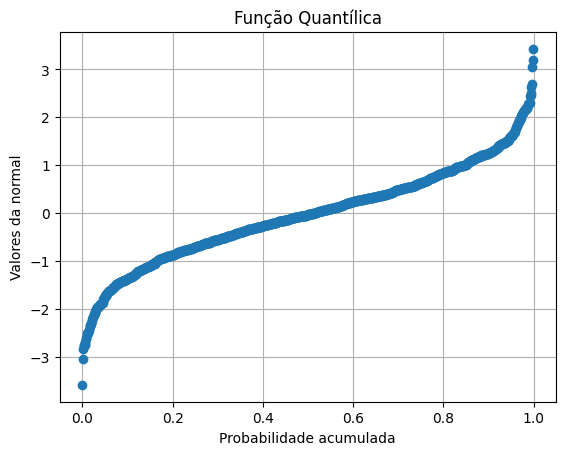

In [672]:
plt.plot(cumulative_prob,sorted_data,marker = 'o',linestyle = 'none')
plt.title('Função Quantílica')
plt.xlabel('Probabilidade acumulada')
plt.ylabel('Valores da normal')
plt.grid()

## Função de Distribuição Acumulada

A Função de Distribuição Cumulativa (FDC), ou Função de Distribuição Acumulada, é um conceito central em probabilidade e estatística. Ela descreve a probabilidade de que uma variável aleatória
X tome um valor menor ou igual a um determinado valor
x.

Definição
Para uma variável aleatória
X, a FDC
F(x) é definida como:

F(x)=P(X≤x)
Isto representa a probabilidade de
X ser menor ou igual a
x.

In [673]:
import seaborn as sns

In [674]:
data = [2,3,3,5,7]

In [675]:
sorted_data = np.sort(data)

In [676]:
data_len = len(sorted_data)

In [677]:
cdf_values = []

In [678]:
for i in range(data_len):
  cdf_value = np.sum(sorted_data <= sorted_data[i])/data_len
  cdf_values.append(cdf_value)

In [679]:
cdf_values

[0.2, 0.6, 0.6, 0.8, 1.0]

In [680]:
# Distribuição Normal

mean = 0
std = 1
size = 1000

In [681]:
np.random.seed(12)

In [682]:
data = np.random.normal(loc = mean, scale = std, size = size)

In [683]:
# CDF de um único ponto

cdf_neg_one = norm.cdf(-1, loc = data.mean(), scale = data.std())

In [684]:
print(cdf_neg_one)

0.1677257390652831


In [685]:
# CDF de uma faixa entre -2 a 2

upper_cdf = norm.cdf(2, loc = data.mean(), scale = data.std())
lower_cdf = norm.cdf(-2, loc = data.mean(), scale = data.std())

In [686]:
range_cdf = upper_cdf - lower_cdf

In [687]:
print(range_cdf)

0.948693353036605


In [688]:
# CDF valor acima de 2

cdf_greater_2 = 1 - norm.cdf(2, loc = data.mean(), scale = data.std())

In [689]:
print(cdf_greater_2)

0.024977151083182214


### Gráfico

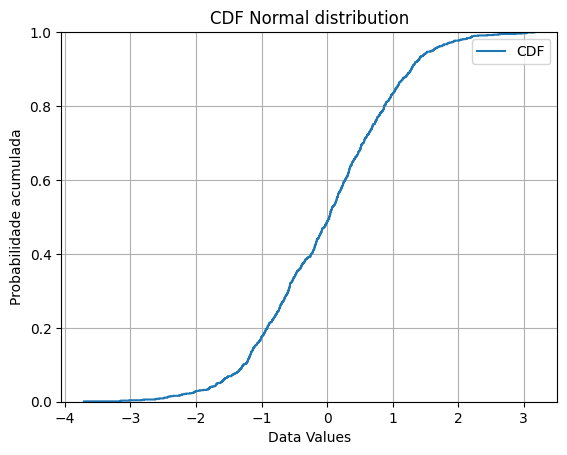

In [690]:
sns.ecdfplot(data, label = 'CDF')
plt.title('CDF Normal distribution')
plt.xlabel('Data Values')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Coeficiente de Correlação de Pearson

O Coeficiente de Correlação de Pearson (ou Coeficiente de Correlação de Pearson em português) é uma medida estatística que avalia a força e a direção de uma relação linear entre duas variáveis. O valor desse coeficiente varia de -1 a 1:



*   +1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta de forma perfeitamente linear).
*   -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui de forma perfeitamente linear).
*   0 indica que não há correlação linear entre as variáveis.

In [691]:
from scipy.stats import pearsonr

In [692]:
x = [5,11,21,30]

In [693]:
y = [8,17,24,33]

### Manual

In [694]:
x_mean = np.mean(x)

In [695]:
y_mean = np.mean(y)

In [696]:
x_diff = [(xi - x_mean) for xi in x]

In [697]:
x_diff_square = [(xi - x_mean)**2 for xi in x]

In [698]:
y_diff = [(yi - y_mean) for yi in y]

In [699]:
y_diff_square = [(yi - y_mean)**2 for yi in y]

In [700]:
numerator = np.array(x_diff)@np.array(y_diff)

In [701]:
denominator = (np.sum(x_diff_square)*np.sum(y_diff_square))**0.5

In [702]:
r = np.sum(numerator)/denominator

In [703]:
print(r)

0.9911564424693111


### Numpy

In [704]:
# retorna uma matriz de correlação x*y

r_numpy = np.corrcoef(x,y)[0,1]

In [705]:
np.corrcoef(x,y)

array([[1.        , 0.99115644],
       [0.99115644, 1.        ]])

In [706]:
print(r_numpy)

0.9911564424693111


### Scipy

In [707]:
r_scipy,p_value = pearsonr(x,y)

In [708]:
print(r_scipy)

0.9911564424693112


### Pandas

In [709]:
df = pd.DataFrame({'x':x,'y':y})

In [710]:
df.head()

,x,y
0,5,8
1,11,17
2,21,24
3,30,33


In [711]:
r_pandas = df['x'].corr(df['y'])

In [712]:
r_pandas_v2 = df['y'].corr(df['x'])

In [713]:
print(r_pandas)

0.9911564424693111


### Scatter Plot

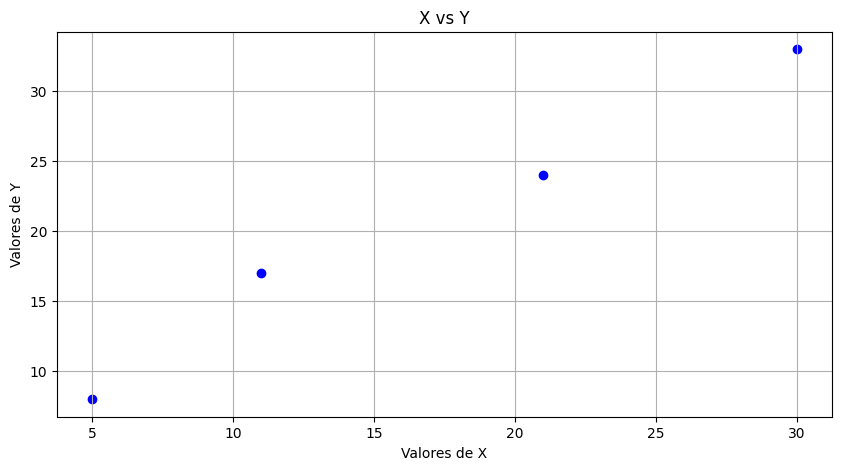

In [714]:
plt.figure(figsize = (10,5))
plt.scatter(x,y, c = 'b')
plt.title('X vs Y')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')
plt.grid(True)
plt.show()

### Correlation Matrix

In [715]:
corr_matrix = np.corrcoef(x,y)

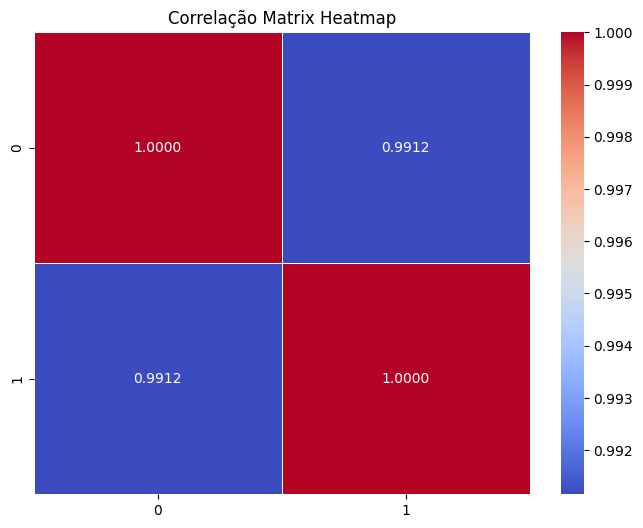

In [716]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Correlação Matrix Heatmap")
plt.show()

## Coeficiente de Variaçao

O Coeficiente de Variação (CV) é uma medida estatística que expressa a dispersão ou variabilidade de um conjunto de dados em relação à sua média. Ele é amplamente utilizado para comparar a variabilidade entre diferentes conjuntos de dados, especialmente quando eles possuem escalas ou unidades diferentes.



In [717]:
from scipy.stats import variation

In [718]:
data = [32,56,67,23,45,12,86]

### Numpy

In [719]:
mean = np.mean(data)

In [720]:
# Population

std_dv_pop = np.std(data)

In [721]:
cv_numpy_pop = (std_dv_pop/mean)*100

In [722]:
print(cv_numpy_pop)

52.277076544306624


In [723]:
# Amostra

std_dv_sample = np.std(data,ddof = 1)

In [724]:
cv_numpy_sample = (std_dv_sample/mean)*100

In [725]:
print(cv_numpy_sample)

56.46569625907848


### Scipy

In [726]:
cv_scipy_pop = variation(data)*100

In [727]:
print(cv_scipy_pop)

52.277076544306624


### Pandas

In [728]:
df = pd.DataFrame({'valores':data})

In [729]:
df.head()

,valores
0,32
1,56
2,67
3,23
4,45


In [730]:
mean_df = df['valores'].mean()

In [731]:
std_df = df['valores'].std()

In [732]:
cv_df = (std_df/mean_df)*100

In [733]:
print(cv_df)

56.46569625907848


## Covariância

A covariância é uma medida estatística que indica a relação linear entre duas variáveis. Ela mostra como as mudanças em uma variável estão associadas às mudanças em outra. A covariância pode ser positiva, negativa ou zero, dependendo do tipo de relação entre as variáveis.



### Manual

In [734]:
stock_a = [100,104,111,123,145]
stock_b = [200,201,212,211,240]

In [735]:
n = len(stock_a)

In [736]:
mean_a = np.sum(stock_a)/n

In [737]:
mean_b = np.sum(stock_b)/n

In [738]:
diff_product_sum = 0

In [739]:
for i in range(n):
  dif_a = stock_a[i]-mean_a
  dif_b = stock_b[i]-mean_b
  diff_product_sum += dif_a*dif_b

In [740]:
cv_manual = diff_product_sum/(n-1)

In [741]:
print(cv_manual)

281.65


### Numpy

In [742]:
X = [1.9,2.1,3.6,4.1,5.1]
Y = [7,11,13.4,14.7,15.2]

In [743]:
cov_matrix = np.cov(X,Y,ddof = 0)

In [744]:
cov_matrix

array([[1.4704, 3.2924],
       [3.2924, 9.0304]])

### Pandas

In [745]:
df = pd.DataFrame({'X':X,'Y':Y})

In [746]:
cov_df = df.cov()

In [747]:
print(cov_df)

        X        Y
X  1.8380   4.1155
Y  4.1155  11.2880


In [748]:
cov_xy = cov_df.loc['X','Y']

In [749]:
print(cov_xy)

4.115499999999999


### Heatmap

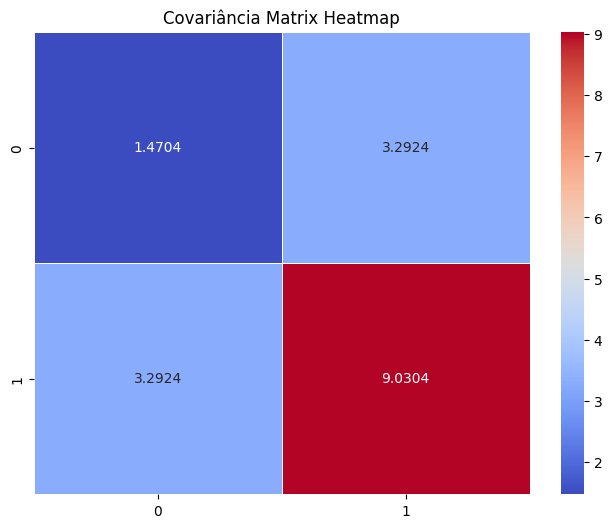

In [750]:
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Covariância Matrix Heatmap")
plt.show()

## Lei dos Grandes Números

É um princípio fundamental da probabilidade e da estatística que afirma que, à medida que o número de experimentos independentes aumenta, a média dos resultados observados tende a se aproximar da média esperada (ou valor esperado) da distribuição.

#### Bernoulli

In [751]:
np.random.seed(15)

In [752]:
n_tentativas = 10000

In [753]:
coin_flips = np.random.randint(0,2,size = n_tentativas)

In [754]:
print(coin_flips)

[0 1 0 ... 0 0 1]


In [755]:
cumulative_mean = np.cumsum(coin_flips)/np.arange(1,n_tentativas+1)

In [756]:
cumulative_mean

array([0.        , 0.5       , 0.33333333, ..., 0.49929986, 0.49924992,
       0.4993    ])

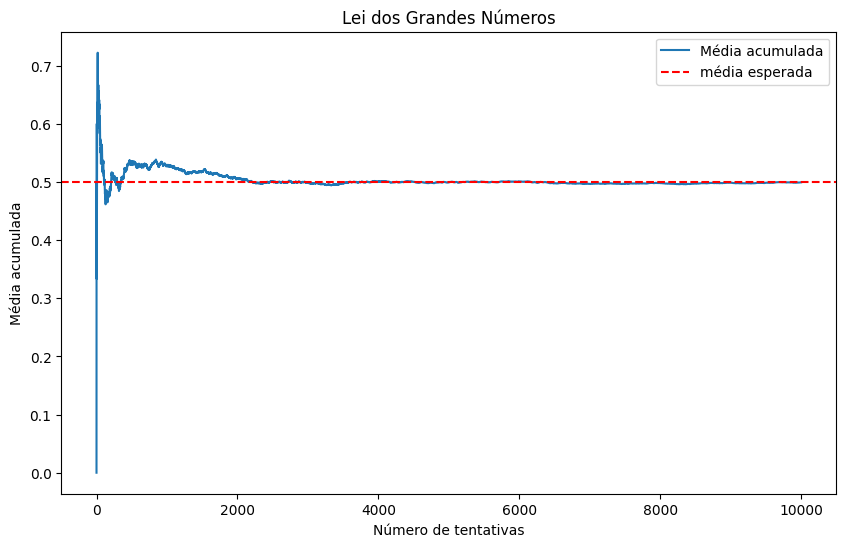

In [757]:
plt.figure(figsize = (10,6))
plt.plot(cumulative_mean,label = 'Média acumulada')
plt.xlabel('Número de tentativas')
plt.ylabel('Média acumulada')
plt.axhline(y = 0.5, color = 'r',linestyle = '--',label= 'média esperada')
plt.title('Lei dos Grandes Números')
plt.legend()
plt.show()

### Distribuiçaõ Normal

In [758]:
n_samples = 10000

In [759]:
mu = 120000

In [760]:
sigma = 30000

In [761]:
salarios = np.random.normal(mu,sigma,n_samples)

In [762]:
print(salarios[0:20])

[ 86557.72708154  92285.89710962 123322.04883557 137360.71737542
 118491.85772298 105677.96469194 124375.35509491 161984.00409879
 147560.49561443 114268.9114837   83745.07434785 165446.36376488
 127866.02471259 142613.65261782 124793.15581127 108329.62226231
 128462.07454797  86051.61333993 185230.2134097  138241.35388197]


In [763]:
salario_cumulativo = np.cumsum(salarios)/np.arange(1,n_samples+1)

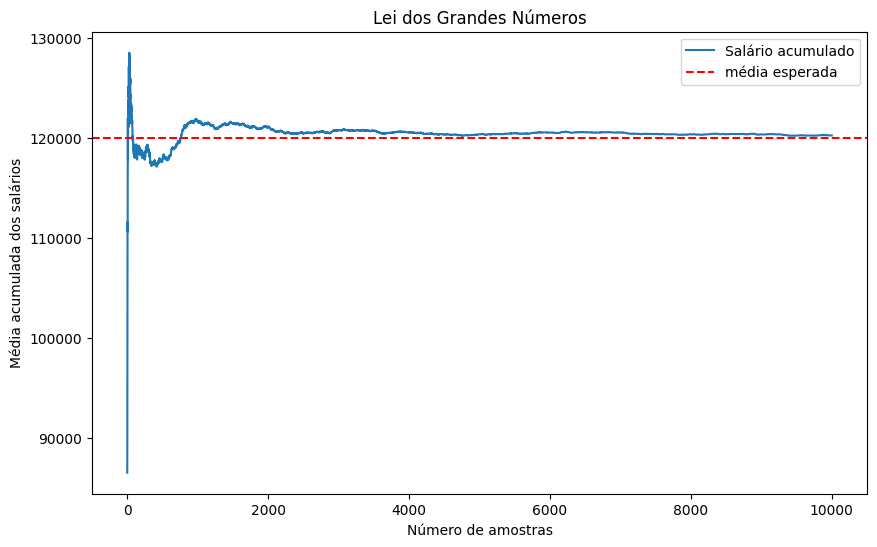

In [764]:
plt.figure(figsize = (10,6))
plt.plot(salario_cumulativo,label = 'Salário acumulado')
plt.xlabel('Número de amostras')
plt.ylabel('Média acumulada dos salários')
plt.axhline(y = mu, color = 'r',linestyle = '--',label= 'média esperada')
plt.title('Lei dos Grandes Números')
plt.legend()
plt.show()

## Skewness(Assimetria)

Skewness (ou assimetria em português) é uma medida estatística que descreve a simetria de uma distribuição de dados. Ela indica se os dados estão mais concentrados em um lado da média (centro) ou se há uma cauda mais longa em um dos extremos da distribuição.



*   Skewness positiva (assimetria à direita): Quando a cauda direita da distribuição é mais longa ou mais espessa, ou seja, a maior parte dos dados está concentrada à esquerda da média, mas há alguns valores altos que puxam a média para a direita.



*   Skewness negativa (assimetria à esquerda): Quando a cauda esquerda da distribuição é mais longa ou mais espessa, indicando que a maior parte dos dados está à direita da média, com alguns valores baixos que puxam a média para a esquerda.


*   Skewness zero: Quando a distribuição é simétrica, a média, a mediana e a moda coincidem, e não há caudas mais longas de um lado ou de outro.



In [765]:
np.random.seed(13)

In [766]:
right_skewed_data = np.random.exponential(scale = 2, size = 1000)

In [767]:
mean_right = np.mean(right_skewed_data)
median_right = np.median(right_skewed_data)
mode_right = stats.mode(right_skewed_data,keepdims = True)[0][0]

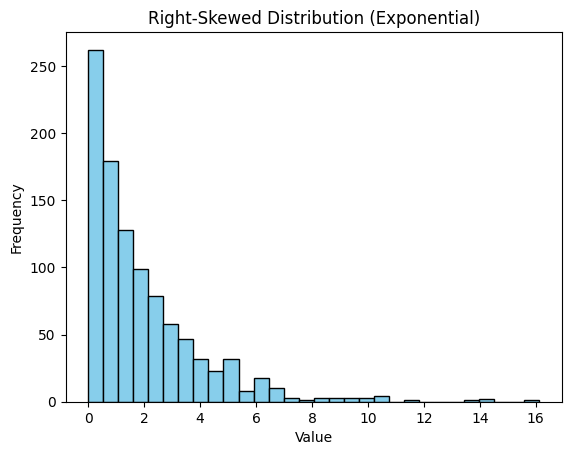

In [768]:
# Plot histogram
plt.hist(right_skewed_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Right-Skewed Distribution (Exponential)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [769]:
left_skewed_data = np.random.exponential(scale = 2, size = 1000)*(-1) + 7

In [770]:
mean_left = np.mean(left_skewed_data)
median_left = np.median(left_skewed_data)
mode_left = stats.mode(left_skewed_data,keepdims = True)[0][0]

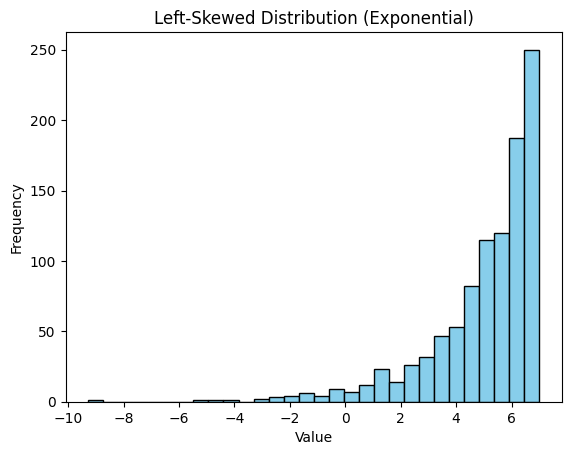

In [771]:
# Plot histogram
plt.hist(left_skewed_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Left-Skewed Distribution (Exponential)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [772]:
normal_data = np.random.normal(loc = 5, scale = 1.5, size = 1000)

In [773]:
mean_normal = np.mean(normal_data)
median_normal = np.median(normal_data)
mode_normal = stats.mode(normal_data,keepdims = True)[0][0]

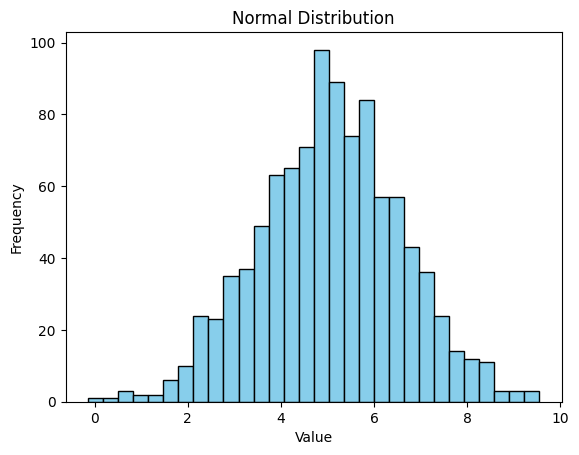

In [774]:
# Plot histogram
plt.hist(normal_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

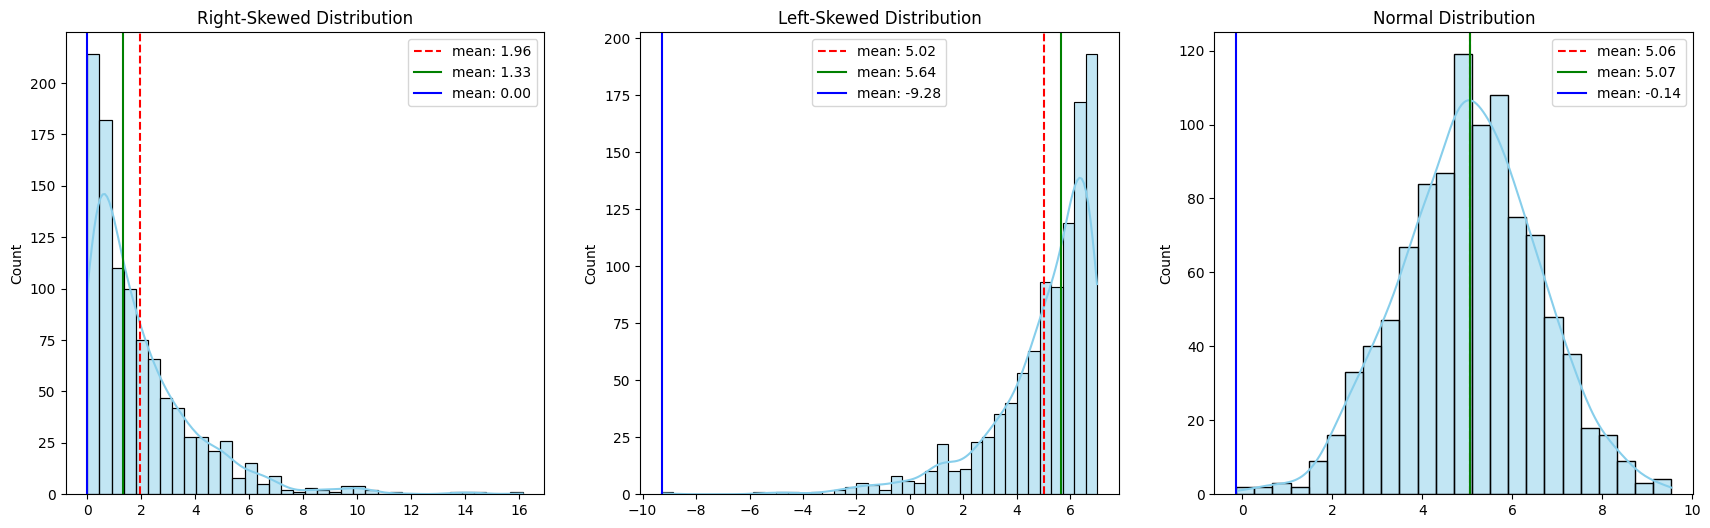

In [775]:
plt.figure(figsize = (21,6))

plt.subplot(1,3,1)
sns.histplot(right_skewed_data,kde = True, color = 'skyblue')
plt.axvline(mean_right, color='r', linestyle='--', label=f'mean: {mean_right:.2f}')
plt.axvline(median_right, color='g', linestyle='-', label=f'mean: {median_right:.2f}')
plt.axvline(mode_right, color='b', linestyle='-', label=f'mean: {mode_right:.2f}')
plt.title('Right-Skewed Distribution')
plt.legend()

plt.subplot(1,3,2)
sns.histplot(left_skewed_data,kde = True, color = 'skyblue')
plt.axvline(mean_left, color='r', linestyle='--', label=f'mean: {mean_left:.2f}')
plt.axvline(median_left, color='g', linestyle='-', label=f'mean: {median_left:.2f}')
plt.axvline(mode_left, color='b', linestyle='-', label=f'mean: {mode_left:.2f}')
plt.title('Left-Skewed Distribution')
plt.legend()

plt.subplot(1,3,3)
sns.histplot(normal_data,kde = True, color = 'skyblue')
plt.axvline(mean_normal, color='r', linestyle='--', label=f'mean: {mean_normal:.2f}')
plt.axvline(median_normal, color='g', linestyle='-', label=f'mean: {median_normal:.2f}')
plt.axvline(mode_normal, color='b', linestyle='-', label= f'mean: {mode_normal:.2f}')
plt.title('Normal Distribution')
plt.legend()


### Box-plot

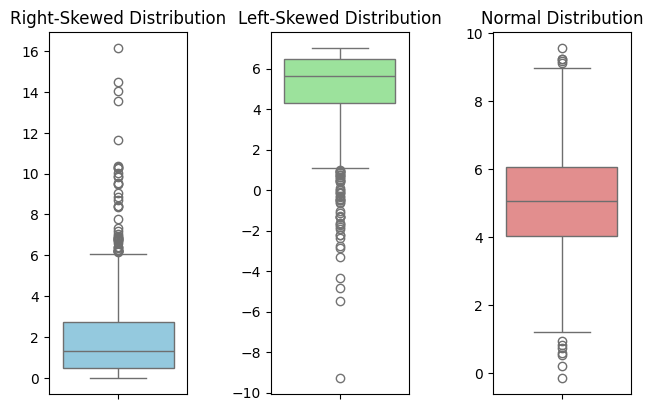

In [776]:
plt.subplot(1,3,1)
sns.boxplot(y = right_skewed_data ,color = 'skyblue')
plt.title('Right-Skewed Distribution')

plt.subplot(1,3,2)
sns.boxplot(y = left_skewed_data ,color = 'lightgreen')
plt.title('Left-Skewed Distribution')

plt.subplot(1,3,3)
sns.boxplot(y = normal_data ,color = 'lightcoral')
plt.title('Normal Distribution')

plt.tight_layout()
plt.subplots_adjust(wspace = 0.6, top = 0.8)
plt.show()

[link text](https://)## Teorema do Limite Central

 É um dos pilares fundamentais da estatística e afirma que, sob certas condições, a distribuição de médias amostrais de uma variável aleatória tende a ser aproximadamente uma distribuição normal, independentemente da forma da distribuição original, à medida que o tamanho da amostra aumenta.

In [777]:
np.random.seed(13)

### Exemplo 1: Distribuição Assimétrica

In [778]:
pop_size = 100000

In [779]:
scale = 2

In [780]:
skewed = np.random.exponential(scale = scale, size = pop_size)

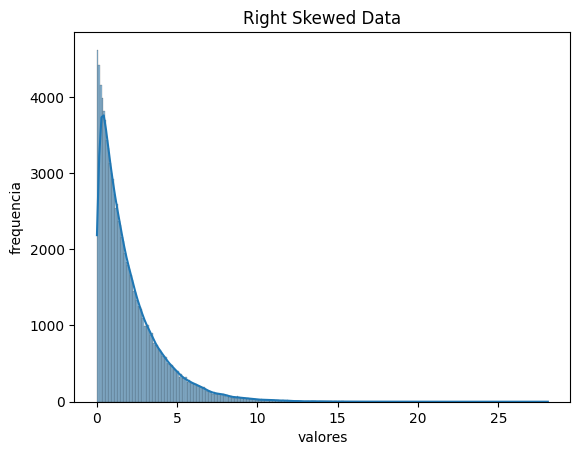

In [781]:
sns.histplot(skewed, kde = True)
plt.title('Right Skewed Data')
plt.xlabel('valores')
plt.ylabel('frequencia')
plt.show()

In [782]:
skewed_means = []

In [783]:
num_samples = 1000

In [784]:
sample_size_v1 = 30

In [785]:
for i in range(num_samples):
  sample = np.random.choice(skewed,size = sample_size_v1,replace = False)
  sample_mean = sum(sample)/sample_size_v1
  skewed_means.append(sample_mean)

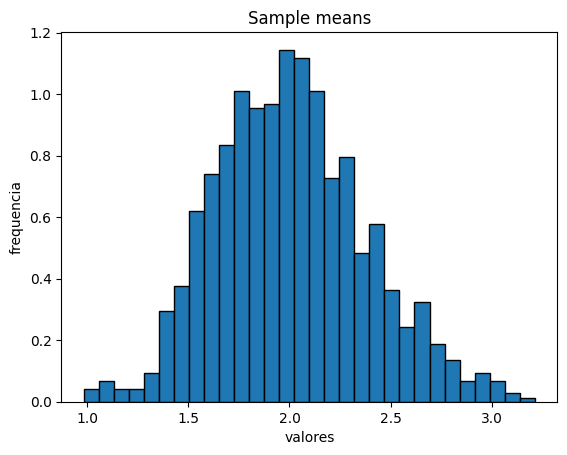

In [786]:
plt.hist(skewed_means,bins = 30, edgecolor = 'black', density = True)
plt.title('Sample means')
plt.xlabel('valores')
plt.ylabel('frequencia')
plt.show()

In [787]:
sample_size_v2 = 100

In [788]:
for i in range(num_samples):
  sample = np.random.choice(skewed,size = sample_size_v2,replace = False)
  sample_mean = sum(sample)/sample_size_v2
  skewed_means.append(sample_mean)

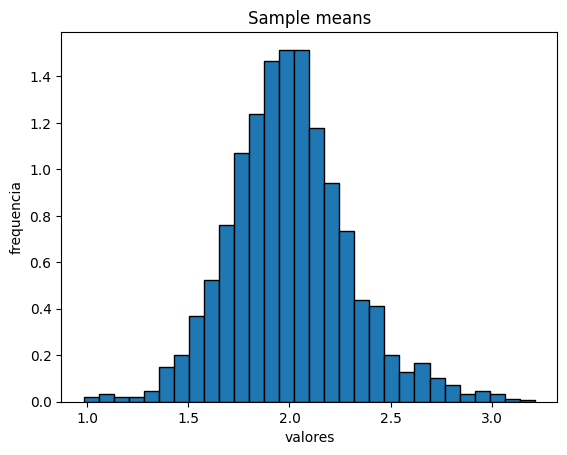

In [789]:
plt.hist(skewed_means,bins = 30, edgecolor = 'black', density = True)
plt.title('Sample means')
plt.xlabel('valores')
plt.ylabel('frequencia')
plt.show()

### Exemplo 2: Distribuição Binomial

In [790]:
n_tentativas = 10

In [791]:
p_value = 0.5

In [792]:
population_size = 100000

In [793]:
binomial_data = np.random.binomial(n_tentativas,p_value,population_size)

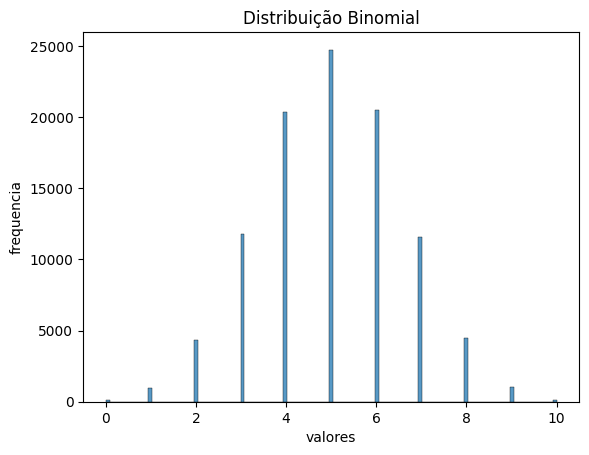

In [794]:
sns.histplot(binomial_data, kde = False)
plt.title('Distribuição Binomial')
plt.xlabel('valores')
plt.ylabel('frequencia')
plt.show()

In [795]:
sample_size_bin = 50

In [796]:
num_samples = 1000

In [797]:
bin_samples = []

In [798]:
for i in range(num_samples):
  sample = np.random.choice(binomial_data,size = sample_size_bin,replace = False)
  sample_mean = sum(sample)/sample_size_bin
  bin_samples.append(sample_mean)

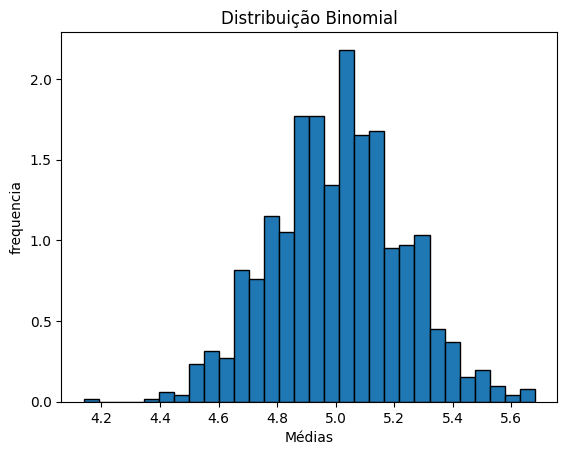

In [799]:
plt.hist(bin_samples,bins = 30, edgecolor = 'black', density = True)
plt.title('Distribuição Binomial')
plt.xlabel('Médias')
plt.ylabel('frequencia')
plt.show()

### Distribuição de Poisson

In [800]:
lambda_poisson = 3

In [801]:
pop_size = 100000

In [802]:
poisson_data = np.random.poisson(lambda_poisson,pop_size)

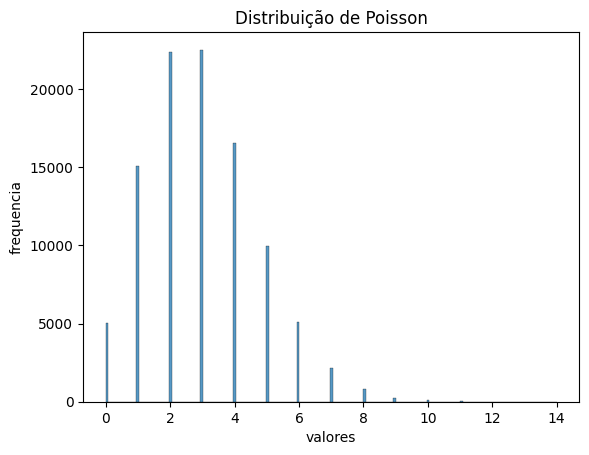

In [803]:
sns.histplot(poisson_data, kde = False)
plt.title('Distribuição de Poisson')
plt.xlabel('valores')
plt.ylabel('frequencia')
plt.show()

In [804]:
sample_size = 30

In [805]:
num_samples = 1000

In [806]:
poisson_samples = []

In [807]:
for i in range(num_samples):
  sample = np.random.choice(poisson_data,size = sample_size,replace = False)
  sample_mean = sum(sample)/sample_size
  poisson_samples.append(sample_mean)

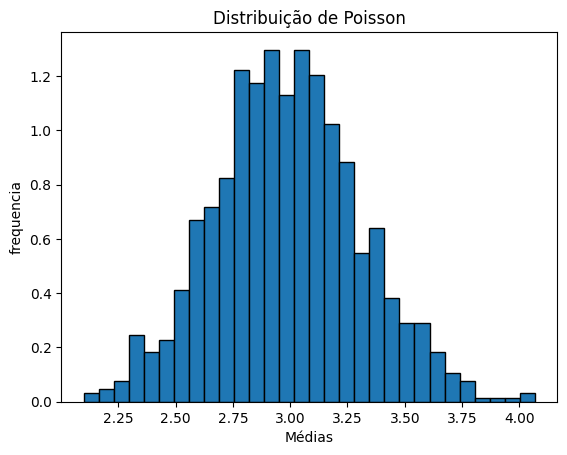

In [808]:
plt.hist(poisson_samples,bins = 30, edgecolor = 'black', density = True)
plt.title('Distribuição de Poisson')
plt.xlabel('Médias')
plt.ylabel('frequencia')
plt.show()

## Distribuições

#### Distribuição Normal

In [809]:
mean = 0
std_dev = 1
size = 1000

In [810]:
data = np.random.normal(loc = mean, scale = std_dev, size = size)

In [811]:
# Média

print(np.mean(data))

-0.006572308582262513


In [812]:
# Mediana

print(np.median(data))

0.01851551816944394


In [813]:
# Std

print(np.std(data))

0.9853623356724995


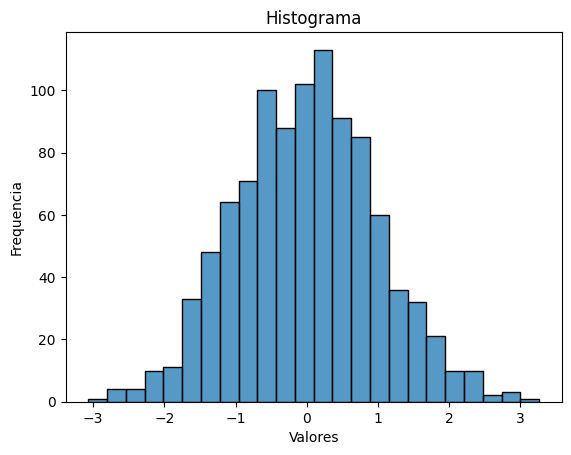

In [814]:
sns.histplot(data)
plt.xlabel("Valores")
plt.ylabel("Frequencia")
plt.title("Histograma")
plt.show()

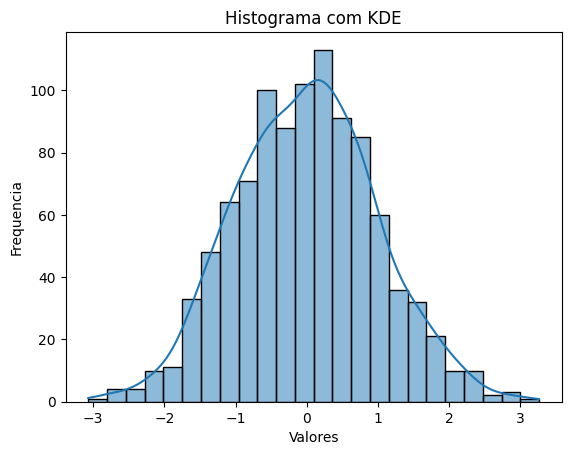

In [815]:
sns.histplot(data, kde = True)
plt.xlabel("Valores")
plt.ylabel("Frequencia")
plt.title("Histograma com KDE")
plt.show()

In [816]:
# Z Score

df = pd.DataFrame(data, columns = ['Value'])

In [817]:
df.head()

,Value
0,1.867610
1,0.060091
2,0.163141
3,0.529234
4,0.706960


In [818]:
df['Z-Score'] = (df['Value'] - df['Value'].mean())/df['Value'].std()

In [819]:
df.head()

,Value,Z-Score
0,1.867610,1.901072
1,0.060091,0.067620
2,0.163141,0.172148
3,0.529234,0.543494
4,0.706960,0.723770


In [820]:
# Aplicando um filtro:

df_cleaned = df[(df['Z-Score']>= -3) & (df['Z-Score']<=3)]

In [821]:
df_cleaned.head(10)

,Value,Z-Score
0,1.867610,1.901072
1,0.060091,0.067620
2,0.163141,0.172148
3,0.529234,0.543494
4,0.706960,0.723770
5,0.686898,0.703420
6,-0.767414,-0.771758
7,0.291498,0.302347
8,0.469579,0.482983
9,-0.959479,-0.966578


In [822]:
# CDF

cdf_zero = norm.cdf(0,loc = data.mean(), scale = data.std())

In [823]:
print(cdf_zero)

0.5026609017185077
